In [ ]:
# MULTICLASS CLASSIFICATION PROBLEM

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Click the button on top that says, `Open in Colab`, to run this notebook as a Colab. Running the notebook on your local machine might result in some of the code blocks throwing errors.

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      csv_reader = csv.reader(training_file, delimiter=',')
      first_line = True
      temp_images = []
      temp_labels = []
      for row in csv_reader:
          if first_line:
                # print("Ignoring first line")
              first_line = False
          else:
              temp_labels.append(row[0])
              image_data = row[1:785]
              image_data_as_array = np.array_split(image_data, 28)
              temp_images.append(image_data_as_array)
      images = np.array(temp_images).astype('float')
      labels = np.array(temp_labels).astype('float')
      ### START CODE HERE


      ### END CODE HERE
    return images, labels


training_images, training_labels = get_data('./sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 132MB/s]
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, 3)
testing_images =  np.expand_dims(testing_images, 3)

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   height_shift_range= 0.2,
                                   width_shift_range= 0.2,
                                   rotation_range= 40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest'
    ### YOUR CODE HERE
    )

validation_datagen = ImageDataGenerator(rescale = 1/255
    ### YOUR CODE HERE
    )

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [6]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation= 'relu', input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dense(26, activation = 'softmax')]
    ### START CODE HERE                                
    
    
    ### END CODE HERE
    )

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate= 0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
batch_size =32
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size =batch_size),
                    steps_per_epoch = (len(training_images)/batch_size),
                    epochs=15,
                    validation_data = validation_datagen.flow(testing_images, testing_labels, batch_size= batch_size),
                    validation_steps = len(testing_images)/batch_size)

model.evaluate(testing_images, testing_labels)

# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]


Epoch 1/15
857/857 [==============================] - 30s 24ms/step - loss: 2.7937 - accuracy: 0.1565 - val_loss: 2.1593 - val_accuracy: 0.2578
Epoch 2/15
857/857 [==============================] - 22s 25ms/step - loss: 2.0949 - accuracy: 0.3463 - val_loss: 1.3158 - val_accuracy: 0.5569
Epoch 3/15
857/857 [==============================] - 20s 24ms/step - loss: 1.6879 - accuracy: 0.4651 - val_loss: 1.0844 - val_accuracy: 0.6386
Epoch 4/15
857/857 [==============================] - 21s 25ms/step - loss: 1.4003 - accuracy: 0.5509 - val_loss: 0.7967 - val_accuracy: 0.7366
Epoch 5/15
857/857 [==============================] - 19s 22ms/step - loss: 1.2116 - accuracy: 0.6070 - val_loss: 0.7539 - val_accuracy: 0.7408
Epoch 6/15
857/857 [==============================] - 19s 22ms/step - loss: 1.0730 - accuracy: 0.6468 - val_loss: 0.5265 - val_accuracy: 0.8176
Epoch 7/15
857/857 [==============================] - 19s 23ms/step - loss: 0.9579 - accuracy: 0.6887 - val_loss: 0.5039 - val_accuracy:

[198.10829162597656, 0.6915783882141113]

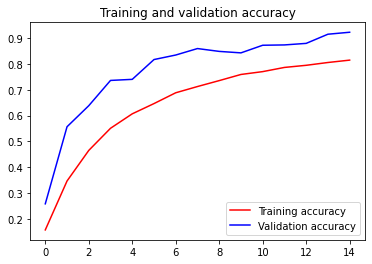

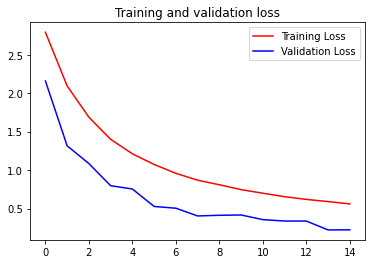

In [8]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()